## Imports

In [1]:
import pandas as pd
print pd.__version__


import matplotlib
import matplotlib.pyplot as plt
print matplotlib.__version__

from collections import Counter

import numpy as np
print np.__version__


import scipy
import scipy.stats as stats
print scipy.__version__

import seaborn as sns
print sns.__version__

import Bio as biopython
print biopython.__version__

%matplotlib inline

0.23.4
2.2.3
1.15.4
1.1.0
0.9.0
1.71


In [2]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import tools to creat inset plots

from Bio.SeqUtils import MeltingTemp
# import function that can calculate RNA/DNA melt. temperature

## Import and format data

In [3]:
z_score_table = pd.read_csv('../align_count_HISEQ/z_score_table.tsv', sep = '\t', index_col=0)
# import table with z_score data

#print z_score_table.head(10)

FDR_threshold = -2.01
# get z-score threshold for the 5% false positive rate

chip_annot_data = pd.read_csv('./chip_table_reannot_revised.tsv', sep = '\t', index_col=0)
# import table with guide annotations
# print chip_annot_data.head(10)



708


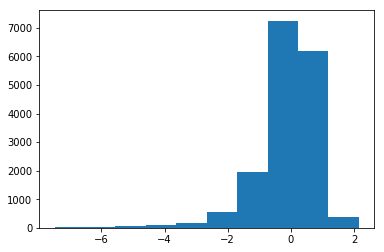

In [4]:
plt.hist(z_score_table['z_score_meanSE'])

print len(z_score_table[z_score_table['z_score_meanSE']<=-2.01])

## GC content

In [14]:
chip_annot_data['%GC'] = np.nan
chip_annot_data['%GC'] = chip_annot_data['%GC'].astype('float64')
# create an empty column that will hold the GC content of each gRNA

for guide in chip_annot_data.index:    
    seq = chip_annot_data.loc[guide]['sequence']
    # go through all gRNAs and get their sequence       
      
    gc_con = len([x for x in seq if x in ['G','C']])*1.0/20*100
    # calculate GC content
    
    chip_annot_data.at[guide, ('%GC')] = gc_con
    # insert GC content in table

## RNA:DNA binding energy

34.0748995193


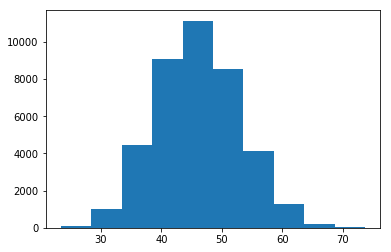

In [15]:
chip_annot_data['grna_binding'] = np.nan
chip_annot_data['grna_binding'] = chip_annot_data['grna_binding'].astype('float64')
# create an empty column that will hold the gRNA/DNA melting temperature

for guide in chip_annot_data.index:    
    seq = chip_annot_data.loc[guide]['sequence']
    # go through all gRNAs and get their sequence   
    
    seq = seq.replace('T', 'U')
    # convert guide sequence to RNA
    
    binding_energy = MeltingTemp.Tm_NN(seq, nn_table=MeltingTemp.R_DNA_NN1)
    # calculate melting temperature of RNA/DNA duplex
    
    chip_annot_data.at[guide, ('grna_binding')] = binding_energy
    # insert melt temp in table     
    
plt.hist(chip_annot_data['grna_binding'])
# plot melt temp distribution across all gRNAs    

a = 'AUGCCGCGAUG'
a = a.replace('T', 'U')
print MeltingTemp.Tm_NN(a, nn_table=MeltingTemp.R_DNA_NN1)
# test for the biopython function and switch to RNA

## Raw read counts

In [12]:
raw_counts = pd.read_csv('./full_guide_counts_v1_corr.csv', sep=',', index_col = 0)
# get raw read counts from previous data analysis output

chip_annot_data['raw_gal_A'] = raw_counts['gal_16_A']
chip_annot_data['raw_gal_B'] = raw_counts['gal_16_B']
chip_annot_data['raw_UR2_A'] = raw_counts['DSUR2_16_A']
chip_annot_data['raw_UR2_B'] = raw_counts['DSUR2_16_B']
chip_annot_data['raw_gly_A'] = raw_counts['gly_16_A']
chip_annot_data['raw_gly_B'] = raw_counts['gly_16_B']
chip_annot_data['raw_glu_A'] = raw_counts['glu_16_A']
chip_annot_data['raw_glu_B'] = raw_counts['glu_16_B']
chip_annot_data['raw_DS_A'] = raw_counts['DS_16_A']
chip_annot_data['raw_DS_B'] = raw_counts['DS_16_B']
chip_annot_data['raw_UR1_A'] = raw_counts['DSUR1_16_A']
chip_annot_data['raw_UR1_B'] = raw_counts['DSUR1_16_B']
chip_annot_data['raw_mock_A'] = raw_counts['mock_16_A']
chip_annot_data['raw_mock_B'] = raw_counts['mock_16_B']

raw_counts.head(10)

,DSUR1_16_A,DSUR1_16_B,DSUR2_16_A,DSUR2_16_B,DS_16_A,DS_16_B,NoDSUR1_16_A,NoDSUR1_16_B,NoDSUR2_16_A,NoDSUR2_16_B,gal_16_A,gal_16_B,glu_16_A,glu_16_B,gly_16_A,gly_16_B,mock_16_A,mock_16_B,noDS_16_A,noDS_16_B
chrIII_107238r,101,40,87,49,40,54,160,62,92,47,56,31,43,17,38,7,32,59,86,59
chrIII_109198,125,87,54,47,65,51,18,13,95,69,95,65,27,14,23,26,50,75,19,158
chrIII_109389,8,36,31,0,40,36,11,29,8,13,125,2,2,0,16,0,10,10,27,0
chrIII_109436r,47,2,27,26,98,16,36,72,49,16,39,23,21,9,35,5,85,9,62,41
chrIII_109462,55,140,110,107,157,22,74,29,97,19,94,44,18,18,77,21,53,31,145,8
chrIII_109476r,460,245,439,262,362,317,373,265,233,295,437,241,178,92,344,78,387,259,326,166
chrIII_109514r,17,13,26,32,25,27,115,6,38,37,13,5,6,6,40,14,59,37,91,44
chrIII_109525,83,100,153,116,74,72,55,43,55,28,112,61,44,13,118,48,109,13,36,47
chrIII_109526,160,116,53,44,72,97,33,86,125,40,86,36,38,18,111,79,97,60,169,67
chrIII_109538r,141,106,138,125,118,150,125,75,77,79,361,188,97,43,94,27,109,117,198,96


In [13]:
print len(chip_annot_data)

in_experiment = [x for x in chip_annot_data.index if x in z_score_table.index]

all_guides = chip_annot_data.loc[in_experiment]

all_guides['z_score_meanSE'] = z_score_table['z_score_meanSE']

print len(all_guides)

39978
16754


## Figure S16

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:98: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:120: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:125: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python2.7/dist-pack

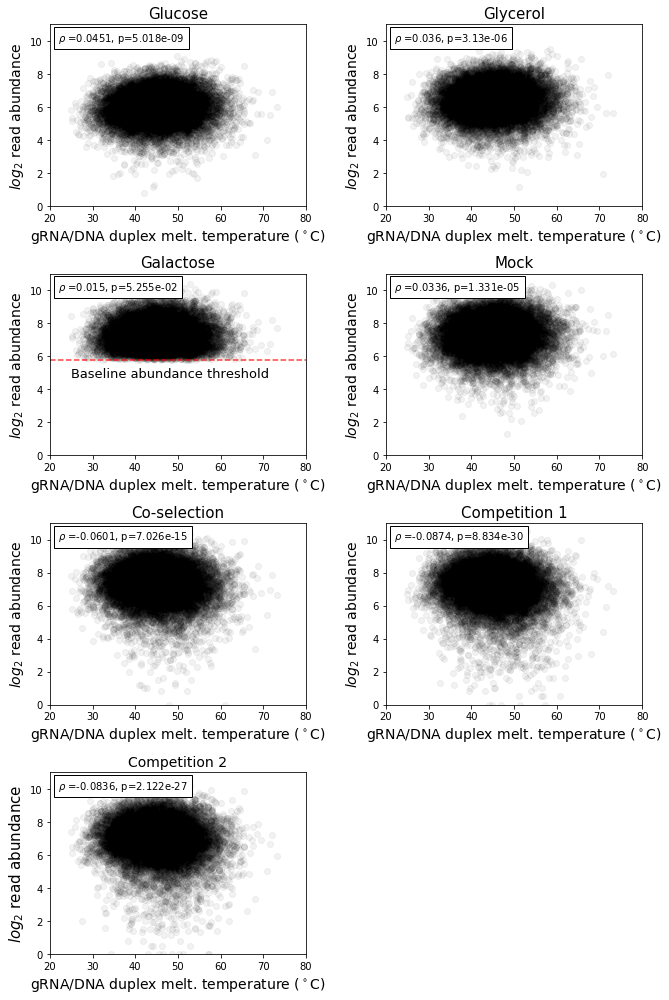

In [19]:
plt.figure(figsize = (9.5,14))

########################
plt.subplot(421)
# create panel

plt.scatter(all_guides['grna_binding'], ((np.log2(all_guides['raw_glu_A']) + np.log2(all_guides['raw_glu_B']))/2.0), 
            color = 'k', alpha = 0.05)
# scatter plot mean log2 read abundance vs gRNA/DNA duplex melt temp

rho = stats.spearmanr(all_guides['grna_binding'], 
                     ((np.log2(all_guides['raw_glu_A']) + np.log2(all_guides['raw_glu_B']))/2.0))
# get spearman rank correlation between mean log2 read abundance and gRNA/DNA duplex melt temp

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(22,10, (r'$\rho$ =' + annot), bbox=dict(facecolor='white', ec='k'))
# annotate plot with rho and pvalue

plt.xlim(20,80)
plt.ylim(0,11)
# set axis limits

plt.title('Glucose', fontsize = 15)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('$log_2$ read abundance', fontsize = 14)
# set title and axis labels

########################
plt.subplot(422)
# create panel

plt.scatter(all_guides['grna_binding'], ((np.log2(all_guides['raw_gly_A']) + np.log2(all_guides['raw_gly_B']))/2.0), 
            color = 'k', alpha = 0.05)
# scatter plot mean log2 read abundance vs gRNA/DNA duplex melt temp

rho = stats.spearmanr(all_guides['grna_binding'], 
                     ((np.log2(all_guides['raw_gly_A']) + np.log2(all_guides['raw_gly_B']))/2.0))
# get spearman rank correlation between mean log2 read abundance and gRNA/DNA duplex melt temp

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(22,10, (r'$\rho$ =' + annot), bbox=dict(facecolor='white', ec='k'))
# annotate plot with rho and pvalue

plt.xlim(20,80)
plt.ylim(0,11)
# set axis limits

plt.title('Glycerol', fontsize = 15)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('$log_2$ read abundance', fontsize = 14)
# set title and axis labels

########################
plt.subplot(423)
# create panel

plt.scatter(all_guides['grna_binding'], ((np.log2(all_guides['raw_gal_A']) + np.log2(all_guides['raw_gal_B']))/2.0), 
            color = 'k', alpha = 0.05)
# scatter plot mean log2 read abundance vs gRNA/DNA duplex melt temp

rho = stats.spearmanr(all_guides['grna_binding'], 
                      ((np.log2(all_guides['raw_gal_A']) + np.log2(all_guides['raw_gal_B']))/2.0))
# get spearman rank correlation between mean log2 read abundance and gRNA/DNA duplex melt temp

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(22,10, (r'$\rho$ =' + annot), bbox=dict(facecolor='white', ec='k'))
# annotate plot with rho and pvalue

plt.xlim(20,80)
plt.ylim(0,11)
# set axis limits


plt.title('Galactose', fontsize = 15)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('$log_2$ read abundance', fontsize = 14)
# set title and axis labels

plt.axhline(np.log2(54), linestyle = '--', color = 'red', alpha = 0.75)
plt.text(25, 4.75, 'Baseline abundance threshold', fontsize = 13)
# show baseline abundance threshold as a red dotted line

########################
plt.subplot(424)
# create panel

plt.scatter(all_guides['grna_binding'], ((np.log2(all_guides['raw_mock_A']) + np.log2(all_guides['raw_mock_B']))/2.0), 
            color = 'k', alpha = 0.05)
# scatter plot mean log2 read abundance vs gRNA/DNA duplex melt temp

rho = stats.spearmanr(all_guides['grna_binding'], 
                      ((np.log2(all_guides['raw_mock_A']) + np.log2(all_guides['raw_mock_B']))/2.0))
# get spearman rank correlation between mean log2 read abundance and gRNA/DNA duplex melt temp

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(22,10, (r'$\rho$ =' + annot), bbox=dict(facecolor='white', ec='k'))
# annotate plot with rho and pvalue

plt.xlim(20,80)
plt.ylim(0,11)
# set axis limits

plt.title('Mock', fontsize = 15)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('$log_2$ read abundance', fontsize = 14)
# set title and axis labels

########################
plt.subplot(425)
# create panel

plt.scatter(all_guides['grna_binding'], ((np.log2(all_guides['raw_DS_A']) + np.log2(all_guides['raw_DS_B']))/2.0), 
            color = 'k', alpha = 0.05)
# scatter plot mean log2 read abundance vs gRNA/DNA duplex melt temp

rho = stats.spearmanr(all_guides['grna_binding'], 
                      ((np.log2(all_guides['raw_DS_A']) + np.log2(all_guides['raw_DS_B']))/2.0))
# get spearman rank correlation between mean log2 read abundance and gRNA/DNA duplex melt temp

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(22,10, (r'$\rho$ =' + annot), bbox=dict(facecolor='white', ec='k'))
# annotate plot with rho and pvalue

plt.xlim(20,80)
plt.ylim(0,11)
# set axis limits

plt.title('Co-selection', fontsize = 15)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('$log_2$ read abundance', fontsize = 14)

########################
plt.subplot(426)
# create panel

plt.scatter(all_guides['grna_binding'], ((np.log2(all_guides['raw_UR1_A']) + np.log2(all_guides['raw_UR1_B']))/2.0), 
            color = 'k', alpha = 0.05)
# scatter plot mean log2 read abundance vs gRNA/DNA duplex melt temp

rho = stats.spearmanr(all_guides['grna_binding'], 
                      ((np.log2(all_guides['raw_UR1_A']) + np.log2(all_guides['raw_UR1_B']))/2.0))
# get spearman rank correlation between mean log2 read abundance and gRNA/DNA duplex melt temp

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(22,10, (r'$\rho$ =' + annot), bbox=dict(facecolor='white', ec='k'))
# annotate plot with rho and pvalue

plt.xlim(20,80)
plt.ylim(0,11)
# set axis limits

plt.title('Competition 1', fontsize = 15)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('$log_2$ read abundance', fontsize = 14)
# set title and axis labels

########################
plt.subplot(427)
# create panel


plt.scatter(all_guides['grna_binding'], ((np.log2(all_guides['raw_UR2_A']) + np.log2(all_guides['raw_UR2_B']))/2.0), 
            color = 'k', alpha = 0.05)
# scatter plot mean log2 read abundance vs gRNA/DNA duplex melt temp

rho = stats.spearmanr(all_guides['grna_binding'], 
                      ((np.log2(all_guides['raw_UR2_A']) + np.log2(all_guides['raw_UR2_B']))/2.0))
# get spearman rank correlation between mean log2 read abundance and gRNA/DNA duplex melt temp

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(22,10, (r'$\rho$ =' + annot), bbox=dict(facecolor='white', ec='k'))
# annotate plot with rho and pvalue

plt.xlim(20,80)
plt.ylim(0,11)
# set axis limits

plt.title('Competition 2', fontsize = 14)
plt.xlabel('gRNA/DNA duplex melt. temperature ($^\circ$C)', fontsize = 14)
plt.ylabel('$log_2$ read abundance', fontsize = 15)
# set title and axis labels

###################
plt.tight_layout()
# finishing touch

#plt.savefig('./manuscript/figures/rawreads_GC_corr.svg', format = 'svg', dpi = 300)

## Figure S8

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:109: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:133: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:134: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-pa

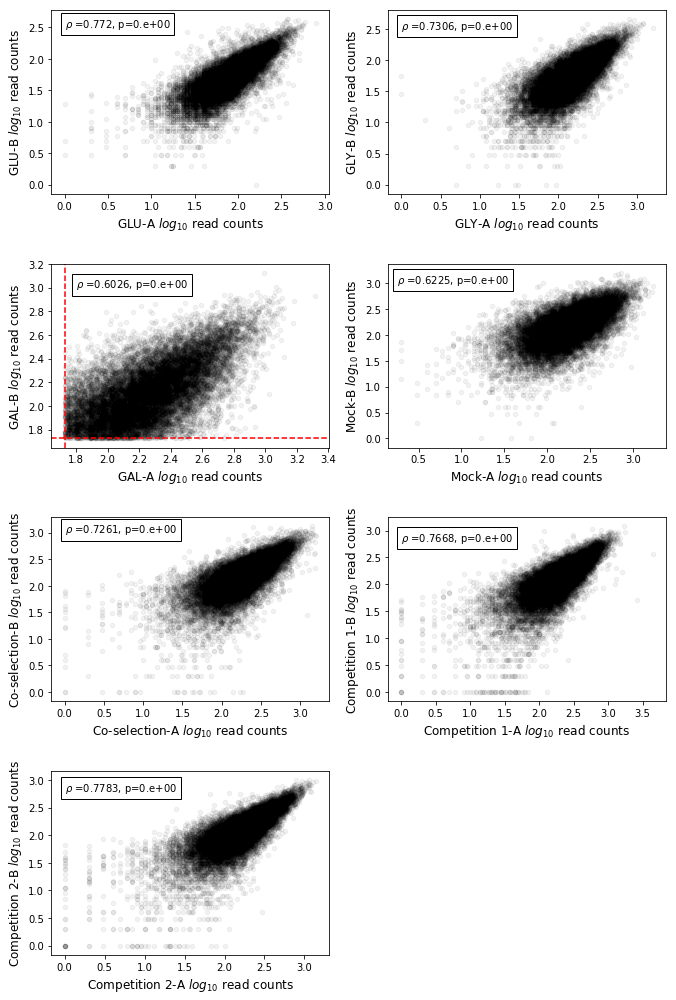

In [20]:

plt.figure(figsize = (9.5,14))
# create the figure

plt.subplot(421)
# create panel

all_guides['log10_glu_A'] = np.log10(all_guides['raw_glu_A'])
all_guides['log10_glu_B'] = np.log10(all_guides['raw_glu_B'])
# create columns with log10 transformation

all_guides.plot.scatter('log10_glu_A', 'log10_glu_B', color = 'k', alpha = 0.05, ax=plt.gca())
# scatter plot both replicates against one another 

rho = stats.spearmanr(all_guides['log10_glu_A'], all_guides['log10_glu_B'])
# get spearman rank correlation between replicates

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.xlabel('GLU-A $log_{10}$ read counts', fontsize = 12)
plt.ylabel('GLU-B $log_{10}$ read counts', fontsize = 12)
# set axis labels

plt.text(0,2.5, (r'$\rho$ =' + annot), bbox=dict(facecolor='white'))
# annotate plot with rho and pvalue

#################################
plt.subplot(422)
# create panel

all_guides['log10_gly_A'] = np.log10(all_guides['raw_gly_A'])
all_guides['log10_gly_B'] = np.log10(all_guides['raw_gly_B'])
# create columns with log10 transformation

all_guides.plot.scatter('log10_gly_A', 'log10_gly_B', color = 'k', alpha = 0.05, ax=plt.gca())
# scatter plot both replicates against one another 

rho = stats.spearmanr(all_guides['log10_gly_A'], all_guides['log10_gly_B'])
# get spearman rank correlation between replicates

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(0,2.5, (r'$\rho$ =' + annot), bbox=dict(facecolor='white'))
# annotate plot with rho and pvalue

plt.xlabel('GLY-A $log_{10}$ read counts', fontsize = 12)
plt.ylabel('GLY-B $log_{10}$ read counts', fontsize = 12)
# set axis labels

##########################
plt.subplot(423)
# create panel

all_guides['log10_gal_A'] = np.log10(all_guides['raw_gal_A'])
all_guides['log10_gal_B'] = np.log10(all_guides['raw_gal_B'])
# create columns with log10 transformation

all_guides.plot.scatter('log10_gal_A', 'log10_gal_B', color = 'k', alpha = 0.05, ax=plt.gca())
# scatter plot both replicates against one another 

rho = stats.spearmanr(all_guides['log10_gal_A'], all_guides['log10_gal_B'])
# get spearman rank correlation between replicates

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(1.8,3, (r'$\rho$ =' + annot), bbox=dict(facecolor='white'))
# annotate plot with rho and pvalue

plt.axvline(np.log10(54), linestyle = '--', color = 'red')
plt.axhline(np.log10(54), linestyle = '--', color = 'red')
# plot red lines denoting the base abundance cutoff at baseline used in the relative abundance variation 
# analysis, explaining the hard cutoffs in abundance distribution

plt.xlabel('GAL-A $log_{10}$ read counts', fontsize = 12)
plt.ylabel('GAL-B $log_{10}$ read counts', fontsize = 12)
# set axis labels

##########################
plt.subplot(424)
# create panel

all_guides['log10_mock_A'] = np.log10(all_guides['raw_mock_A'])
all_guides['log10_mock_B'] = np.log10(all_guides['raw_mock_B'])
# create columns with log10 transformation

all_guides.plot.scatter('log10_mock_A', 'log10_mock_B', color = 'k', alpha = 0.05, ax=plt.gca())
# scatter plot both replicates against one another 

rho = stats.spearmanr(all_guides['log10_mock_A'], all_guides['log10_mock_B'])
# get spearman rank correlation between replicates

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(0.25,3, (r'$\rho$ =' + annot), bbox=dict(facecolor='white'))
# annotate plot with rho and pvalue

plt.xlabel('Mock-A $log_{10}$ read counts', fontsize = 12)
plt.ylabel('Mock-B $log_{10}$ read counts', fontsize = 12)
# set axis labels

###########################
plt.subplot(425)
# create panel

all_guides['log10_DS_A'] = np.log10(all_guides['raw_DS_A'])
all_guides['log10_DS_B'] = np.log10(all_guides['raw_DS_B'])
# create columns with log10 transformation

all_guides.plot.scatter('log10_DS_A', 'log10_DS_B', color = 'k', alpha = 0.05, ax=plt.gca())
# scatter plot both replicates against one another 

rho = stats.spearmanr(all_guides['log10_DS_A'], all_guides['log10_DS_B'])
# get spearman rank correlation between replicates

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(0,3, (r'$\rho$ =' + annot), bbox=dict(facecolor='white'))
# annotate plot with rho and pvalue

plt.xlabel('Co-selection-A $log_{10}$ read counts', fontsize = 12)
plt.ylabel('Co-selection-B $log_{10}$ read counts', fontsize = 12)
# set axis labels

##########################
plt.subplot(426)
# create panel

all_guides['log10_UR1_A'] = np.log10(all_guides['raw_UR1_A'])
all_guides['log10_UR1_B'] = np.log10(all_guides['raw_UR1_B'])
# create columns with log10 transformation

all_guides.plot.scatter('log10_UR1_A', 'log10_UR1_B', color = 'k', alpha = 0.05, ax=plt.gca())
# scatter plot both replicates against one another 

rho = stats.spearmanr(all_guides['log10_UR1_A'], all_guides['log10_UR1_B'])
# get spearman rank correlation between replicates

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(0,2.8, (r'$\rho$ =' + annot), bbox=dict(facecolor='white'))
# annotate plot with rho and pvalue

plt.xlabel('Competition 1-A $log_{10}$ read counts', fontsize = 12)
plt.ylabel('Competition 1-B $log_{10}$ read counts', fontsize = 12)
# set axis labels

#########################
plt.subplot(427)
# create panel

all_guides['log10_UR2_A'] = np.log10(all_guides['raw_UR2_A'])
all_guides['log10_UR2_B'] = np.log10(all_guides['raw_UR2_B'])
# create columns with log10 transformation

all_guides.plot.scatter('log10_UR2_A', 'log10_UR2_B', color = 'k', alpha = 0.05, ax=plt.gca())
# scatter plot both replicates against one another 

rho = stats.spearmanr(all_guides['log10_UR2_A'], all_guides['log10_UR2_B'])
# get spearman rank correlation between replicates

annot =  str(round(rho[0], 4)) +', p='+ str(np.format_float_scientific(rho[1], 3))
# create stat test values annotation for plot

plt.text(0,2.8, (r'$\rho$ =' + annot), bbox=dict(facecolor='white'))
# annotate plot with rho and pvalue

plt.xlabel('Competition 2-A $log_{10}$ read counts', fontsize = 12)
plt.ylabel('Competition 2-B $log_{10}$ read counts', fontsize = 12)
# set axis labels

plt.tight_layout()
#finishing touches

#plt.savefig('./manuscript/figures/interreplicate_corr.svg', format = 'svg', dpi = 300)

## Figure S9

In [21]:
all_guides_renamed = all_guides.rename(index=str, columns={'raw_gly_A': 'GLY-A',
                              'raw_gly_B': 'GLY-B',
                              'raw_glu_A': 'GLU-A', 
                              'raw_glu_B': 'GLU-B', 
                              'raw_gal_A': 'GAL-A', 
                              'raw_gal_B': 'GAL-B',
                              'raw_DS_A': 'CAN-A', 
                              'raw_DS_B': 'CAN-B',
                              'raw_UR1_A': 'COMP1-A',
                              'raw_UR1_B': 'COMP1-B',
                              'raw_UR2_A': 'COMP2-A',
                              'raw_UR2_B': 'COMP2-B',
                              'raw_mock_A': 'MOCK-A',
                              'raw_mock_B': 'MOCK-B'})
# renames cols for heatmap formating

Text(3,0.5,'$\\rho$')

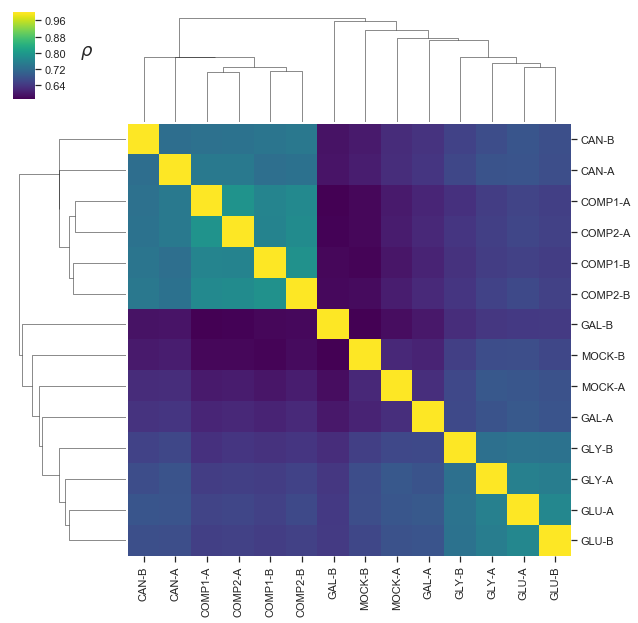

In [22]:
for_corr = all_guides_renamed[['GLY-A','GLY-B','GLU-A', 'GLU-B', 'GAL-A', 'GAL-B', 'CAN-A', 'CAN-B', 'COMP1-A', 
                               'COMP1-B', 'COMP2-A', 'COMP2-B', 'MOCK-A', 'MOCK-B']].corr('spearman')
# creates a spearman rank correlation matrix of raw read abundance between all timepoints and replicates

sns.set(font_scale=1)
sns.set_style("ticks")
# format heatmap

ax1 = sns.clustermap(for_corr, cmap = 'viridis', xticklabels=True, yticklabels=True)
# create heatmap

plt.text(3,0.5, r'$\rho$', fontsize = 18)
# adds rho near the colorbar

#ax1.savefig('./manuscript/figures/timecourse_corr.svg', format='svg', dpi = 300)
# save figure

In [23]:
all_guides.columns

Index([u'number', u'orf_type', u'target', u'position', u'strand', u'sequence',
       u'paxDB_abundance', u'mut1_C>G', u'mut1_C>T', u'mut2_C>G', u'mut2_C>T',
       u'diversity_PTM', u'PTM_number', u'PTM_rate', u'mut_1_effect_bin',
       u'mut_1_effect', u'mut_1_proximity', u'mut_2_effect_bin',
       u'mut_2_effect', u'mut_2_proximity', u'stan_name', u'name',
       u'half_life_val', u'half_life_unit', u'half_life_min', u'hydropath',
       u'codon_adapt_index', u'codon_bias', u'instability_index',
       u'freq_opt_codon', u'length', u'aliphatic_index', u'aromaticity',
       u'mol_weigth', u'%GC', u'grna_binding', u'raw_gal_A', u'raw_gal_B',
       u'raw_UR2_A', u'raw_UR2_B', u'raw_gly_A', u'raw_gly_B', u'raw_glu_A',
       u'raw_glu_B', u'raw_DS_A', u'raw_DS_B', u'raw_UR1_A', u'raw_UR1_B',
       u'raw_mock_A', u'raw_mock_B', u'z_score_meanSE', u'log10_glu_A',
       u'log10_glu_B', u'log10_gly_A', u'log10_gly_B', u'log10_gal_A',
       u'log10_gal_B', u'log10_mock_A', u'log10_moc

In [80]:
print len(all_guides[all_guides['over_threshold']=='Yes'].target.unique())

605


## Create figure 1 panel D

16754
30
160.0 168.5 157.0 138.0
7.321928094887363 7.396604781181859 7.294620748891627 7.108524456778169


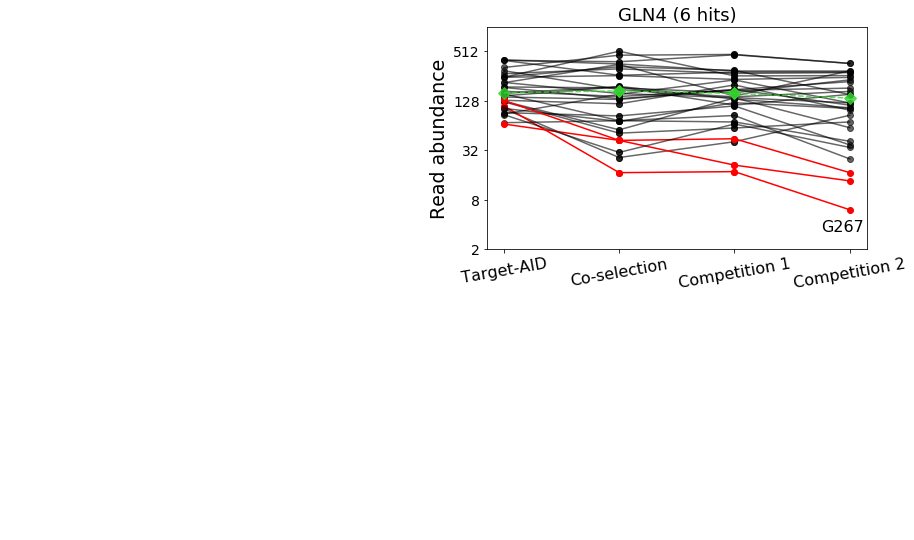

In [14]:
print len(all_guides)
# number of guides with annotated z-scores

plt.figure(figsize = (15,9))
plt.subplot(221)
# creates a figure, and makes an empty subpanel that will help with the formating and display of figure elements

plt.axis('off')
# turns off axis display for the empty plot

plt.subplot(222)
# creates the actual plot

guides_gln4 = all_guides['target'] == 'YOR168W'
# subset condition that selects only gRNAs targeting GLN4

gln4_array = all_guides[guides_gln4]
# selects only gRNAs targeting GLN4

print len(gln4_array)
# number of gRNAs for GLN4 is 30

for guide in gln4_array.index:
    # loops through gRNAs targeting GLN4
    
    if gln4_array.loc[guide]['z_score_meanSE'] <= -2.01:
        color = 'red'
        alpha = 1
        # sets marker and line color as red for gRNAs passing the significance threshold
        
    else:
        color = 'black'
        alpha = 0.6
        # sets marker and line color as black for gRNAs that don't pass the significance threshold
        
        
    mean_at_timepoint1 = (gln4_array.loc[guide]['raw_gal_A'] + gln4_array.loc[guide]['raw_gal_B'])/2.0
    # calculate mean read abundance (rep A and B) at T1 for this gRNA
    
    mean_at_timepoint2 = (gln4_array.loc[guide]['raw_DS_A'] + gln4_array.loc[guide]['raw_DS_B'])/2.0
    plt.plot((1,2), (mean_at_timepoint1, mean_at_timepoint2), 'o-', color=color, alpha = alpha)
    # calculate mean read abundance (rep A and B) at T2 for this gRNA, plot mean T1 to mean T2
    
    mean_at_timepoint3 = (gln4_array.loc[guide]['raw_UR1_A'] + gln4_array.loc[guide]['raw_UR1_B'])/2.0
    plt.plot((2,3), (mean_at_timepoint2, mean_at_timepoint3), 'o-', color=color, alpha = alpha)
    # calculate mean read abundance (rep A and B) at T3 for this gRNA, plot mean T2 to mean T3

    mean_at_timepoint4 = (gln4_array.loc[guide]['raw_UR2_A'] + gln4_array.loc[guide]['raw_UR2_B'])/2.0
    plt.plot((3,4), (mean_at_timepoint3, mean_at_timepoint4), 'o-', color=color, alpha = alpha)
    # calculate mean read abundance (rep A and B) at T4 for this gRNA, plot mean T3 to mean T4
    
median_at_timepoint1 = np.median((all_guides['raw_gal_A']+all_guides['raw_gal_B'])/2.0)
# calculate median read abundance (rep A and B) at T1 for all gRNA

median_at_timepoint2 = np.median((all_guides['raw_DS_A']+all_guides['raw_DS_B'])/2.0)
plt.plot((1,2), (median_at_timepoint1, median_at_timepoint2), 'D--', color='#34D52E', ms=9, alpha =0.8)
# calculate median read abundance (rep A and B) at T2 for all gRNA, plot median T1 to median T2

median_at_timepoint3 = np.median((all_guides['raw_UR1_A']+all_guides['raw_UR1_B'])/2.0)
plt.plot((2,3), (median_at_timepoint2, median_at_timepoint3), 'D--', color='#34D52E', ms=9, alpha =0.8)
# calculate median read abundance (rep A and B) at T3 for all gRNA, plot median T2 to median T3
    
median_at_timepoint4 = np.median((all_guides['raw_UR2_A']+all_guides['raw_UR2_B'])/2.0)
plt.plot((3,4), (median_at_timepoint3, median_at_timepoint4), 'D--', color='#34D52E', ms=9, alpha =0.8)
# calculate median read abundance (rep A and B) at T4 for all gRNA, plot median T3 to median T4
    
print median_at_timepoint1, median_at_timepoint2, median_at_timepoint3, median_at_timepoint4
print np.log2(median_at_timepoint1), np.log2(median_at_timepoint2), np.log2(median_at_timepoint3), np.log2(median_at_timepoint4)
# print median values and their log2

plt.ylim(2,2**10)
# set plot limits
   
plt.yscale('log', basey=2)
# change scale to log2

plt.ylabel('Read abundance', fontsize=19)
# set y label

plt.yticks([2**1,2**3,2**5,2**7,2**9], [2**1,2**3,2**5,2**7,2**9], fontsize=14)
# set ytick values

plt.xticks([1,2,3,4], ['Target-AID', 'Co-selection', 'Competition 1', 'Competition 2'], fontsize=16, rotation=10)
# set x ticks and labels

plt.title('GLN4 (6 hits)', fontsize=18)
# set title

plt.text(3.75,2**1.7, 'G267', fontsize =16)
# annotate with info on GLN4

plt.subplot(223)
plt.axis('off')
plt.subplot(224)
plt.axis('off')
# two other hidden empty subplots that help with the formating

plt.savefig('./figures_revised/gln4_guides_revised_v2.svg', format='svg', dpi = 300)
# save figure

## Create part of figure 1 panel E

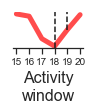

In [105]:
plt.figure(figsize=(1.5,1.7))
# set figure size

ax = plt.subplot(111)
# create plot

x_pos = [15,16,17,18,19,20]
# create positions in gRNA sequence
y_pos = [-0.01,-0.04,-0.34,-0.44,-0.22,-0.02]
# set activity values at the different positions based on Nishida et al

plt.plot(x_pos, y_pos, color = 'red', linestyle = '-', linewidth = 5, alpha = 0.7)
# plot activity as a red line
plt.axvline(18, linestyle = '--', color = 'k')
plt.axvline(19, 0.5, 1, linestyle = '--', color = 'k')
# plot vertical dashed lines at pos 18 and 19

plt.yticks([])
# remove y ticks

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# remove all borders and ticks except for the x-axis

plt.xticks([x for x in range(15,21)], [str(x) for x in range(15,21)], fontsize =10)
# set gRNA nt positions as the x-axis ticks

plt.xlabel('Activity\nwindow', fontsize = 16)
# add x-axis label

plt.tight_layout()
# finishing touches

plt.savefig('./aid_activity_window.svg', format = 'svg', dpi=300)
# save figure

## Figure 1C

In [28]:
chrom_len_dict = {'1':230218,
                  '2':813184,
                  '3':316620,
                  '4':1531933,
                  '5':576874,
                  '6':270161,
                  '7':1090940,
                  '8':562643,
                  '9':439888,
                  '10':745751,
                  '11':666816,
                  '12':1078177,
                  '13':924431,
                  '14':784333,
                  '15':1091291,
                  '16':948066}
# chromosome length for s288c as taken from SGD

cen_dict = {'1':(151465,151582), '2':(238207,238323), '3':(114385,114501), '4':(449711,449821),
            '5':(151987,152104), '6':(148510,148627), '7':(496920,497038), '8':(105586,105703),
            '9':(355629,355745), '10':(436307,436425), '11':(440129,440246), '12':(150828,150947),
            '13':(268031,268149), '14':(628758,628875), '15':(326584,326702), '16':(555957,556073)}
# make a dict of chrom length

In [29]:
#chip_table_z = pd.read_csv('./guide_z_score_table.tsv', sep = '\t', index_col='guide')
# load table w/ z-scores for figure

In [67]:
chr_dict_conv = {'I':1,
                'II':2,
                'III':3,
                'IV':4,
                'V':5,
                'VI':6,
                'VII':7,
                'VIII':8,
                'IX':9,
                'X':10,
                'XI':11,
                'XII':12,
                'XIII':13,
                'XIV':14,
                'XV':15,
                'XVI':16,}
# convert from roman numbers


holder = {'count':0}

def plot_guide_line(guide_coord):
    """function that will plot a red (GNE) or black (NSG) line on a chromosome to generate a map of gRNA target 
    sites
    guide_coord: the guide genomic coordineates (s288c)
    """
    
    col, alpha, length = 'black', 0.25, -0.2
    # baseline plotting params for NSG
    
    if z_score_table.loc[guide_coord]['z_score_meanSE'] <= -2.01:
        # switch color for GNE
        
        col, alpha, length = 'red', 0.9, -0.45
        holder['count']+=1
    
    strand = 1
    
    if guide_coord.endswith('r'):
        
        strand = -1
        
        guide_coord = guide_coord.strip('r')
        
    info_list = guide_coord.split('_')
    
    x_coord = int(info_list[1])
    y_chrom = info_list[0].strip('chr')
    
    y_coord = -chr_dict_conv[y_chrom]
    # set x and coords based on chromosome position and number
    
    
    
    
    plt.plot([x_coord, x_coord], [y_coord, (y_coord+(length*strand))], '-', color =col, 
             zorder = 10, linewidth = 0.5, alpha = alpha)
    # plot lines

16754


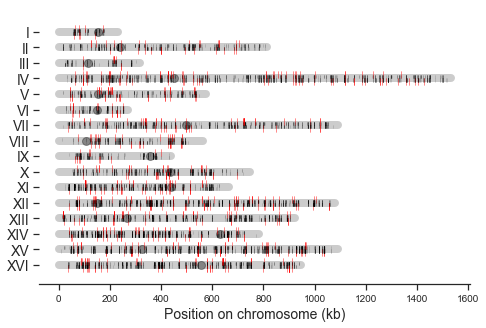

In [70]:
plt.figure(figsize = (17,5))
ax = plt.subplot(122)
# make figure

for chrom in chrom_len_dict:
    
    y_coord = -1*int(chrom)
    
    plt.plot([0,chrom_len_dict[chrom]], [y_coord,y_coord], '-', color = 'black', alpha = 0.2, linewidth =8)
    plt.plot(cen_dict[chrom][0], y_coord, 'ko', ms = 8, alpha = 0.4)
    
# draw chromosomes
    
guide_to_plot = [x for x in z_score_table.index if '|' not in x]
# get index of gRNAs

print len(guide_to_plot)
    
for guide in guide_to_plot:
    
    plot_guide_line(guide)
# plot black and red lines
    
plt.xlabel('Position on chromosome (kb)', fontsize=14)
plt.xticks([100000*x for x in range(0,17,2)], [str(100*x) for x in range(0,17,2)])
plt.yticks([-x for x in range(1,17)], ['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 
                                       'X', 'XI', 'XII', 'XIII','XIV', 'XV', 'XVI'], fontsize =14)
plt.xticks(fontsize=10)
# format ticks and labels

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# remove some plot borders

plt.savefig('./chromosome_target_revised_v2.pdf', format='pdf', dpi=300)

In [69]:
print holder

{'count': 708}
